| Matrix No| Name | Occ |
|----------|---------------------------------------|---------|
| U2001271 | HANANIAH BASYIRAH BINTI MOHD BAKRI | Occ 3 |
| U2001826 | NUR AINA BINTI SAIPULISMI | Occ 3 |
| U2000897 | NUR IZYAN BINTI MOHD ARIS FATHILLAH | Occ 4 |
| U2000935 | NUR DAMIA BINTI MOHD AZMIN | Occ 4 |
| U2001222 | SAHIRA BINTI SHARIF | Occ 4 |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("CATDEPRESSIONDATA1.csv")

In [2]:
df.head()

,"x1,Obesity(1/0)","x2,Decreased appetite (1/0)","x3, More low-pitched meows(1/0)","x4, Poor grooming (1/0)","x5, lost of interest in playing","y, depressed or not(1/0)"
0,1,1,0,1,1,1
1,1,0,1,1,0,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1


In [3]:
#df = df[["Owner", "x1,Obesity", "x2,Decreased appetite", "x3, More low-pitched meows(1/0)", "x4,Poor grooming", "x5, lost of interest in playing", "y, depressed or not"]]
df = df.rename({"x5, lost of interest in playing": "x5, Lack of energy(1/0)"}, axis=1)
df.head()

,"x1,Obesity(1/0)","x2,Decreased appetite (1/0)","x3, More low-pitched meows(1/0)","x4, Poor grooming (1/0)","x5, Lack of energy(1/0)","y, depressed or not(1/0)"
0,1,1,0,1,1,1
1,1,0,1,1,0,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1


In [4]:
df = df[df["x1,Obesity(1/0)"].notnull()]
df.head()

,"x1,Obesity(1/0)","x2,Decreased appetite (1/0)","x3, More low-pitched meows(1/0)","x4, Poor grooming (1/0)","x5, Lack of energy(1/0)","y, depressed or not(1/0)"
0,1,1,0,1,1,1
1,1,0,1,1,0,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1


<AxesSubplot:xlabel='y, depressed or not(1/0)', ylabel='count'>

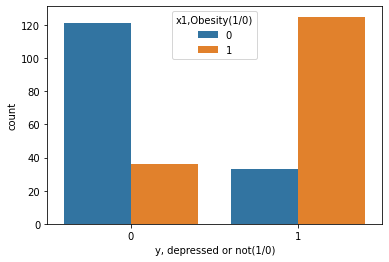

In [5]:
import seaborn as sns
sns.countplot(x='y, depressed or not(1/0)', hue='x1,Obesity(1/0)', data=df)

<AxesSubplot:xlabel='y, depressed or not(1/0)', ylabel='count'>

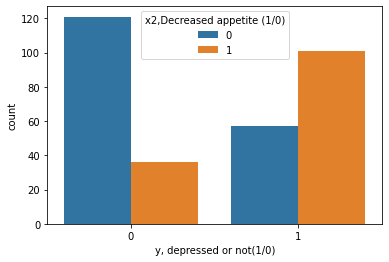

In [6]:
sns.countplot(x='y, depressed or not(1/0)', hue='x2,Decreased appetite (1/0)', data=df)

<AxesSubplot:xlabel='y, depressed or not(1/0)', ylabel='count'>

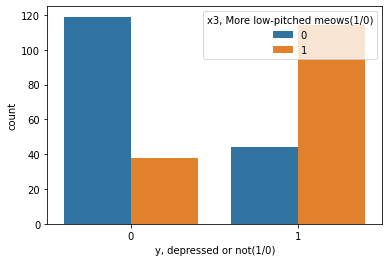

In [7]:
sns.countplot(x='y, depressed or not(1/0)', hue='x3, More low-pitched meows(1/0)', data=df)

<AxesSubplot:xlabel='y, depressed or not(1/0)', ylabel='count'>

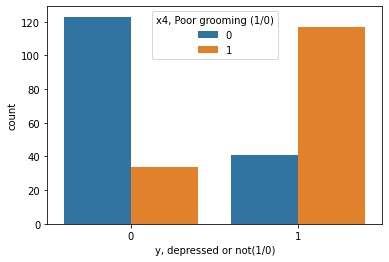

In [8]:
sns.countplot(x='y, depressed or not(1/0)', hue='x4, Poor grooming (1/0)' , data=df)

<AxesSubplot:xlabel='y, depressed or not(1/0)', ylabel='count'>

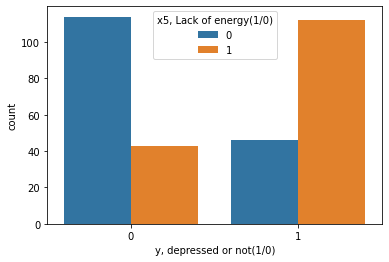

In [9]:
sns.countplot(x='y, depressed or not(1/0)', hue='x5, Lack of energy(1/0)', data=df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 314
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   x1,Obesity(1/0)                  315 non-null    int64
 1   x2,Decreased appetite (1/0)      315 non-null    int64
 2   x3, More low-pitched meows(1/0)  315 non-null    int64
 3   x4, Poor grooming (1/0)          315 non-null    int64
 4   x5, Lack of energy(1/0)          315 non-null    int64
 5   y, depressed or not(1/0)         315 non-null    int64
dtypes: int64(6)
memory usage: 25.3 KB


In [11]:
df = df.dropna()
df.isnull().sum()

x1,Obesity(1/0)                    0
x2,Decreased appetite (1/0)        0
x3, More low-pitched meows(1/0)    0
x4, Poor grooming (1/0)            0
x5, Lack of energy(1/0)            0
y, depressed or not(1/0)           0
dtype: int64

In [12]:
x = df.drop("y, depressed or not(1/0)", axis=1)

y = df["y, depressed or not(1/0)"]
print(x)

     x1,Obesity(1/0)  x2,Decreased appetite (1/0)  \
0                  1                            1   
1                  1                            0   
2                  1                            1   
3                  1                            1   
4                  1                            1   
..               ...                          ...   
310                0                            1   
311                0                            0   
312                1                            1   
313                0                            0   
314                1                            1   

     x3, More low-pitched meows(1/0)  x4, Poor grooming (1/0)  \
0                                  0                        1   
1                                  1                        1   
2                                  1                        1   
3                                  1                        1   
4                                  1  

## Split data into Test and Train to measure accuracy score

In [13]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(211, 5) (104, 5) (211,) (104,)


## Logistic Regression using sklearn library

In [14]:
from sklearn.linear_model import LogisticRegression

# instatiate model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [15]:
#getting predictions using model
y_pred = logreg.predict(X_test)

In [16]:
# getting accuracy using model scoring
logreg.score(X_test, y_test)

0.8846153846153846

In [17]:
##Confusion Matrix
#The result is telling us that we have 44+48 correct predictions and 7+5 incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[44  5]
 [ 7 48]]


In [18]:
# Compute precision, recall, F-measure and support

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        49
           1       0.91      0.87      0.89        55

    accuracy                           0.88       104
   macro avg       0.88      0.89      0.88       104
weighted avg       0.89      0.88      0.88       104



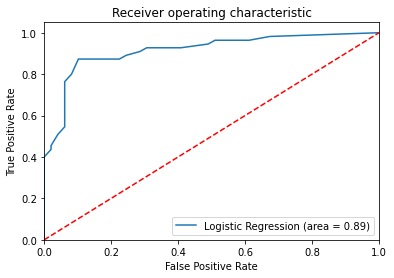

In [19]:
# ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [20]:
x

,"x1,Obesity(1/0)","x2,Decreased appetite (1/0)","x3, More low-pitched meows(1/0)","x4, Poor grooming (1/0)","x5, Lack of energy(1/0)"
0,1,1,0,1,1
1,1,0,1,1,0
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
310,0,1,1,0,1
311,0,0,1,1,0
312,1,1,0,1,0
313,0,0,0,0,0


In [21]:
import numpy as np

x = np.array([[1, 1, 0, 1, 1]])
x

array([[1, 1, 0, 1, 1]])

## Label variable and fit into value 0 or 1

In [22]:
from sklearn.preprocessing import LabelEncoder
le_obesity = LabelEncoder()
le_obesity.fit(y)
le_appetite = LabelEncoder()
le_appetite.fit(y)
le_meow = LabelEncoder()
le_meow.fit(y)
le_grooming = LabelEncoder()
le_grooming.fit(y)
le_energy = LabelEncoder()
le_energy.fit(y)
x[:, 0] = le_obesity.transform(x[:, 0])
x[:, 1] = le_appetite.transform(x[:, 1])
x[:, 2] = le_meow.transform(x[:, 2])
x[:, 3] = le_grooming.transform(x[:, 3])
x[:, 4] = le_energy.transform(x[:, 4])
x = x.astype(int)
x

array([[1, 1, 0, 1, 1]])

In [23]:
y_pred = logreg.predict(x)
y_pred

C:\Users\Sahira\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## Connect model with app

In [24]:
import pickle

In [25]:
data = {"model": logreg, "le_obesity": le_obesity, "le_appetite":le_appetite, "le_meow":le_meow, "le_grooming":le_grooming, "le_energy":le_energy}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [26]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
le_obesity = data["le_obesity"]
le_appetite = data["le_appetite"]
le_meow = data["le_meow"]
le_grooming = data["le_grooming"]
le_energy = data["le_energy"]

In [27]:
y_pred = logreg.predict(x)
y_pred

C:\Users\Sahira\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)